# Keras_imdb_binary_classification_example

## Import and prepare data

In [1]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = 5000)

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension = 5000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Build NN

In [5]:
def build_model(number_of_hidden_layers, number_of_hidden_units, loss):
    """builds the NN model with as many layers as defined in number_of_layers and 
    as many units as defined in number_of_hidden_units
    number_of_layers: int > 0
    number_of_hidden_units: int > 0"""
    assert number_of_hidden_units > 0
    model = tf.keras.models.Sequential()
    if number_of_hidden_layers < 1:
        print("Minimum number of hidden layers is 1. Number of hidden layers set to 1.")
        number_of_hidden_layers = 1
    model.add(tf.keras.layers.Dense(number_of_hidden_units, activation = 'relu', input_shape = (5000,)))
    for layer in range(number_of_hidden_layers - 1):
        model.add(tf.keras.layers.Dense(number_of_hidden_units, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'rmsprop', loss = loss, metrics = ['acc'])
    return model

## Different number of hidden layers

In [6]:
def hidden_layers_models(hidden_layers, number_of_hidden_units, loss):
    models = [build_model(i, number_of_hidden_units, loss) for i in hidden_layers]
    return models

In [7]:
max_number_of_hidden_layers = 5
hidden_layers = [x for x in range(1 ,max_number_of_hidden_layers + 1)]
models_hidden_layers = hidden_layers_models(hidden_layers, 16, 'binary_crossentropy')

## Different number of hidden units per layer

In [8]:
def hidden_units_models(number_of_hidden_layers, number_of_hidden_units, loss):
    models = [build_model(number_of_hidden_layers, i, loss) for i in number_of_hidden_units]
    return models

In [9]:
hidden_units = [4, 8, 16, 32, 64]
models_hidden_units = hidden_units_models(2, hidden_units, 'binary_crossentropy')

## binary_crossentropy vs. mse

In [10]:
loss_functions = ['binary_crossentropy', 'mse']
models_loss =[build_model(2, 16, 'binary_crossentropy'), build_model(2, 16, 'mse')]
#https://stackoverflow.com/questions/36515202/why-is-the-cross-entropy-method-preferred-over-mean-squared-error-in-what-cases
#https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/

## Train NNs

In [11]:
def train_models(models, num_epochs):
    num_epochs = num_epochs
    history = []
    for model in models:
        history.append(model.fit(partial_x_train, 
                                 partial_y_train, 
                                 epochs = num_epochs, 
                                 batch_size = 512, 
                                 validation_data = (x_val, y_val), verbose = 0))
    return history

In [12]:
num_epochs = 5
history_hidden_layers = train_models(models_hidden_layers, num_epochs)
history_hidden_units = train_models(models_hidden_units, num_epochs)
history_loss = train_models(models_loss, num_epochs)

## Visualization

In [13]:
import matplotlib.pyplot as plt

colors1 = ['ro', 'mo', 'yo', 'go', 'bo']
colors2 = ['r', 'm', 'y', 'g', 'b']



In [14]:
def plot_loss(history, title, label, iteration_list):
    plt.clf()
    epochs = range(1, num_epochs + 1)
    history_dict_list = []
    loss_values_list = []
    val_loss_values_list = []
    
    for index, h in enumerate(history):    
        history_dict_list.append(h.history)
        loss_values_list.append(history_dict_list[index]['loss'])
        val_loss_values_list.append(history_dict_list[index]['val_loss'])
        print(epochs)
        print(loss_values_list[index])
        plt.plot(epochs, loss_values_list[index], colors1[index], label = 'Training loss for ' + str(iteration_list[index]) + label)
        plt.plot(epochs, val_loss_values_list[index], colors2[index], label = 'Validation loss ' + str(iteration_list[index]) + label)

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.figure(figsize=(5,5))
    plt.rcParams["figure.figsize"] = [10,10]
    plt.show()

In [15]:
def plot_accuracy(history, title, label, iteration_list):
    plt.clf()
    epochs = range(1, num_epochs + 1)
    history_dict_list = []
    acc_values_list = []
    val_acc_values_list = []

    for index, h in enumerate(history):
        history_dict_list.append(h.history)
        acc_values_list.append(history_dict_list[index]['acc'])
        val_acc_values_list.append(history_dict_list[index]['val_acc'])

        plt.plot(epochs, acc_values_list[index], colors1[index], label = 'Training accuracy for ' + str(iteration_list[index]) + label)
        plt.plot(epochs, val_acc_values_list[index], colors2[index], label = 'Validation accuracy for ' + str(iteration_list[index]) + label)

        plt.title('Training and validation accuracy for different number of hidden layers')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.rcParams["figure.figsize"] = [10,10]
    plt.show()

range(1, 6)
[0.49287586390177407, 0.3248587143421173, 0.2647027018706004, 0.22892909695307415, 0.20480620379447936]
range(1, 6)
[0.5173948486487071, 0.3270009377161662, 0.25684435544808704, 0.21670197416941325, 0.18805501181284587]
range(1, 6)
[0.5284708903630575, 0.3213168594201406, 0.24661340255737305, 0.20175563250382741, 0.1836554914156596]
range(1, 6)
[0.5806397710800171, 0.3507523712793986, 0.25792872516314186, 0.21971202912330628, 0.1907406926314036]
range(1, 6)
[0.5559444123586019, 0.33517034068107604, 0.24619431319236756, 0.21031140340169271, 0.18745522543589274]


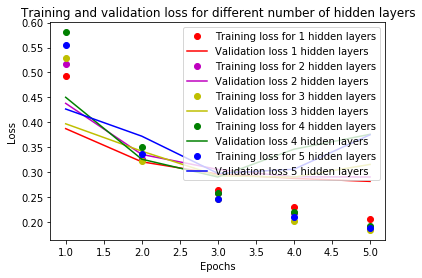

In [16]:
plot_loss(history_hidden_layers, 'Training and validation loss for different number of hidden layers', ' hidden layers', hidden_layers)

range(1, 6)
[0.6373237519900004, 0.5385130502065023, 0.460950732421875, 0.3952318665027618, 0.3410653303146362]
range(1, 6)
[0.5261991546789805, 0.3426437093734741, 0.2709572321653366, 0.23036557157039642, 0.20305451051394144]
range(1, 6)
[0.5101558583100637, 0.31998403674761455, 0.2511723959128062, 0.21474078907966615, 0.19079793808460235]
range(1, 6)
[0.49125095403989155, 0.30717674711545306, 0.23851294390360514, 0.20159929126103718, 0.1794052602291107]
range(1, 6)
[0.49083948906262714, 0.29291837724844616, 0.2313269769748052, 0.19548322167396545, 0.16200097080866496]


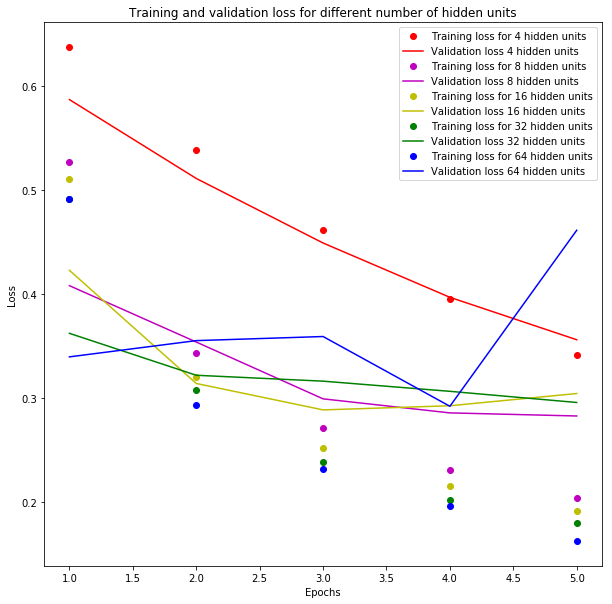

In [17]:
plot_loss(history_hidden_units, 'Training and validation loss for different number of hidden units', ' hidden units', hidden_units)

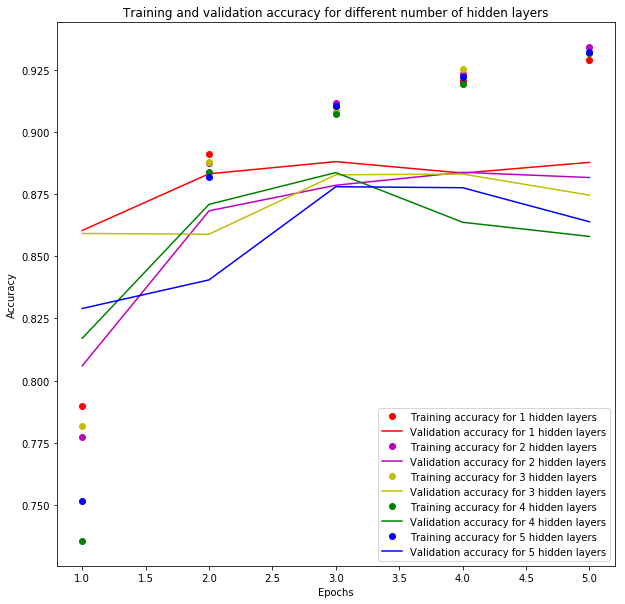

In [18]:
plot_accuracy(history_hidden_layers, 'Training and validation accuracy for different number of hidden layers', ' hidden layers', hidden_layers)

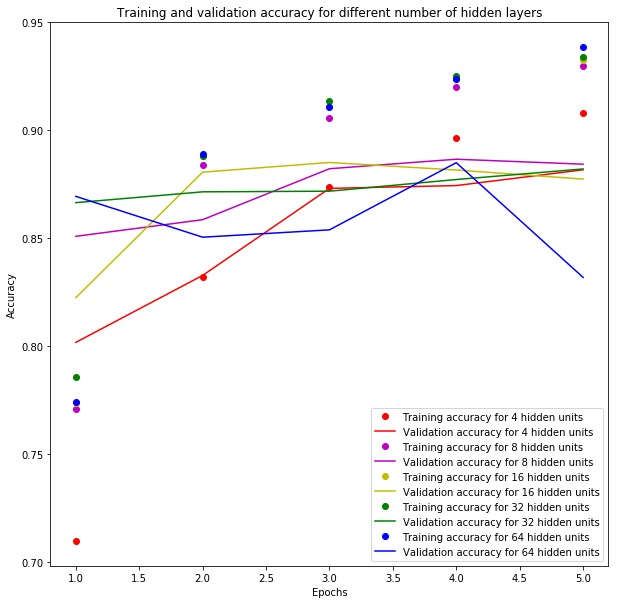

In [19]:
plot_accuracy(history_hidden_units, 'Training and validation accuracy for different number of hidden units', ' hidden units', hidden_units)

range(1, 6)
[0.5360691611448923, 0.34581822578112287, 0.2681077200571696, 0.22616095736821493, 0.19190417941411336]
range(1, 6)
[0.17379477591911952, 0.10196234298547109, 0.07572736552158991, 0.062480348475774126, 0.05419717684189478]


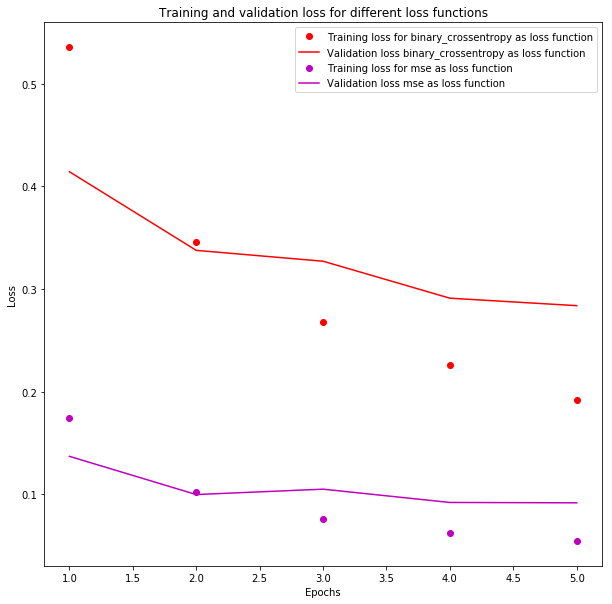

In [20]:
plot_loss(history_loss, 'Training and validation loss for different loss functions', ' as loss function', loss_functions)

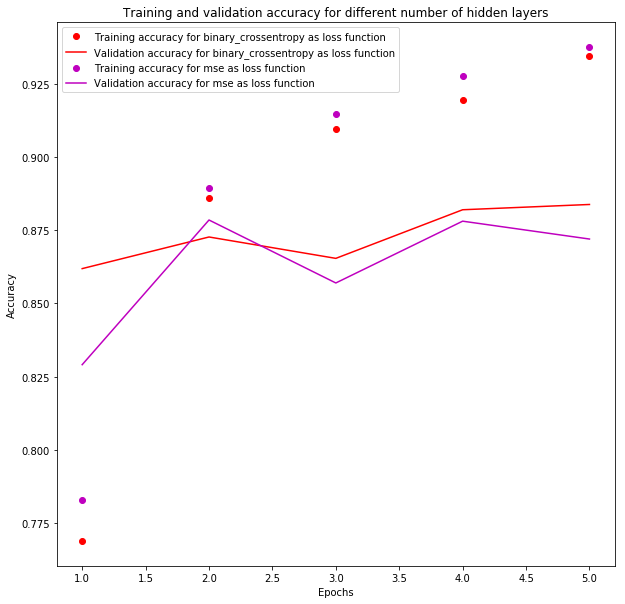

In [21]:
plot_accuracy(history_loss, 'Training and validation accuracy for different loss functions', ' as loss function', loss_functions)